In [2]:
import pandas as pd
data = pd.read_csv('heart.csv')

In [10]:
print("資料摘要")
data.info()
print("n/資料描述 (數值型變數)")
data.describe()

資料摘要
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
n/資料描述 (數值型變數)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
for i in data:
    print(f"\n{i} 欄位的值:")
    print(data[i].value_counts())


age 欄位的值:
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

sex 欄位的值:
sex
1    207
0     96
Name: count, dtype: int64

cp 欄位的值:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

trestbps 欄位的值:
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
1

In [5]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import pandas as pd

data = pd.read_csv('heart.csv')

missing_values = data.isnull().sum()
missing_ratio = missing_values / len(data)
print("缺失值數量:\n", missing_values)
print("缺失值比例:\n", missing_ratio)

缺失值數量:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
缺失值比例:
 age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('heart.csv')

features_to_scale =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("X_train訓練集:", X_train.shape)
print(" X_test測試集:", X_test.shape)
print("y_train訓練集:", y_train.shape)
print("y_test測試集:", y_test.shape)

X_train訓練集: (242, 13)
 X_test測試集: (61, 13)
y_train訓練集: (242,)
y_test測試集: (61,)


In [19]:
from matplotlib import font_manager
print([f.name for f in font_manager.fontManager.ttflist])

['STIXSizeTwoSym', 'DejaVu Sans', 'cmex10', 'cmtt10', 'STIXSizeThreeSym', 'cmmi10', 'STIXGeneral', 'DejaVu Sans', 'cmss10', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeFourSym', 'cmr10', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXGeneral', 'STIXGeneral', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans', 'STIXNonUnicode', 'STIXSizeTwoSym', 'DejaVu Serif', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmb10', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Serif Display', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Serif', 'STIXSizeThreeSym', 'Elephant', 'Segoe UI Historic', 'Segoe UI', 'Bookman Old Style', 'STXinwei', 'Microsoft Himalaya', 'STKaiti', 'Calibri', 'Trebuchet MS', 'Segoe Print', 'Gadugi', 'Arial', 'Calibri', 'Tw Cen MT Condensed', 'Book Antiqua', 'Rockwell Extra Bold', 'Goudy Old Style', 'Bodoni MT', 'Berlin Sans FB', 'Bahnschrift', 'Garamond', 'Lucida Sans Unicode', 'Bell MT', 'Microsoft Tai Le', 'Lu

類別型變數: Index([], dtype='object')
數值型變數: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

標籤分佈:
target
有心臟病    165
無心臟病    138
Name: count, dtype: int64


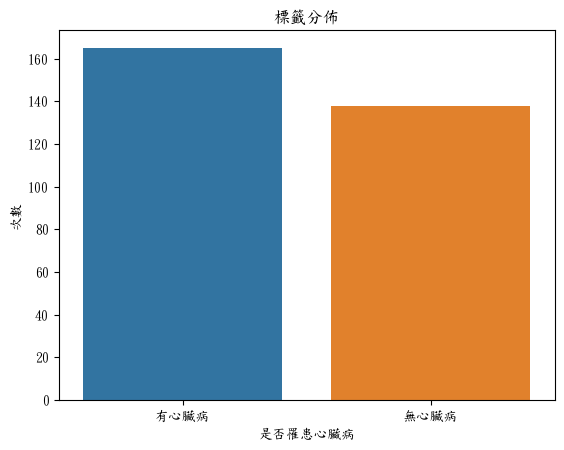

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("類別型變數:", categorical_cols)
print("數值型變數:", numerical_cols)

rcParams['font.sans-serif'] = ['DFKai-SB']  
rcParams['axes.unicode_minus'] = False  

target_col = 'target'  
data[target_col] = data[target_col].replace({0: "無心臟病", 1: "有心臟病"})
if target_col in data.columns:
    print("\n標籤分佈:")
    print(data[target_col].value_counts())
    sns.countplot(data, x=target_col)
    plt.title("標籤分佈")
    plt.xlabel("是否罹患心臟病")
    plt.ylabel("次數")
    plt.show()
else:
    print(f"資料中無 '{target_col}' 欄位，請確認欄位名稱是否正確。")

In [12]:
import pandas as pd
import scipy.stats as stats
data = pd.read_csv('heart.csv')

column_stats = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median(),
    "Std": data.std()
})

print("每項的統計數據（均值、中位數、標準差）：")
print(column_stats)

health_column = "target"
numerical_features = data.select_dtypes(include=['number']).columns.drop(health_column)

healthy = data[data[health_column] == 0]  
diseased = data[data[health_column] == 1] 
results = []
for feature in numerical_features:
    t_stat, p_value = stats.ttest_ind(healthy[feature], diseased[feature], equal_var=False)
    results.append({
        "Feature": feature,
        "T-Statistic": t_stat,
        "P-Value": p_value
    })
    
results_data = pd.DataFrame(results)
results_data["Significant"] = results_data["P-Value"] < 0.05

print("健康與患病群體的數值特徵比較結果：")
print(results_data)

每項的統計數據（均值、中位數、標準差）：
                Mean  Median        Std
age        54.366337    55.0   9.082101
sex         0.683168     1.0   0.466011
cp          0.966997     1.0   1.032052
trestbps  131.623762   130.0  17.538143
chol      246.264026   240.0  51.830751
fbs         0.148515     0.0   0.356198
restecg     0.528053     1.0   0.525860
thalach   149.646865   153.0  22.905161
exang       0.326733     0.0   0.469794
oldpeak     1.039604     0.8   1.161075
slope       1.399340     1.0   0.616226
ca          0.729373     0.0   1.022606
thal        2.313531     2.0   0.612277
target      0.544554     1.0   0.498835
健康與患病群體的數值特徵比較結果：
     Feature  T-Statistic       P-Value  Significant
0        age     4.079669  5.781030e-05         True
1        sex     5.198964  3.723733e-07         True
2         cp    -8.390257  2.016045e-15         True
3   trestbps     2.508347  1.271095e-02         True
4       chol     1.494825  1.360182e-01        False
5        fbs     0.484341  6.285155e-01    

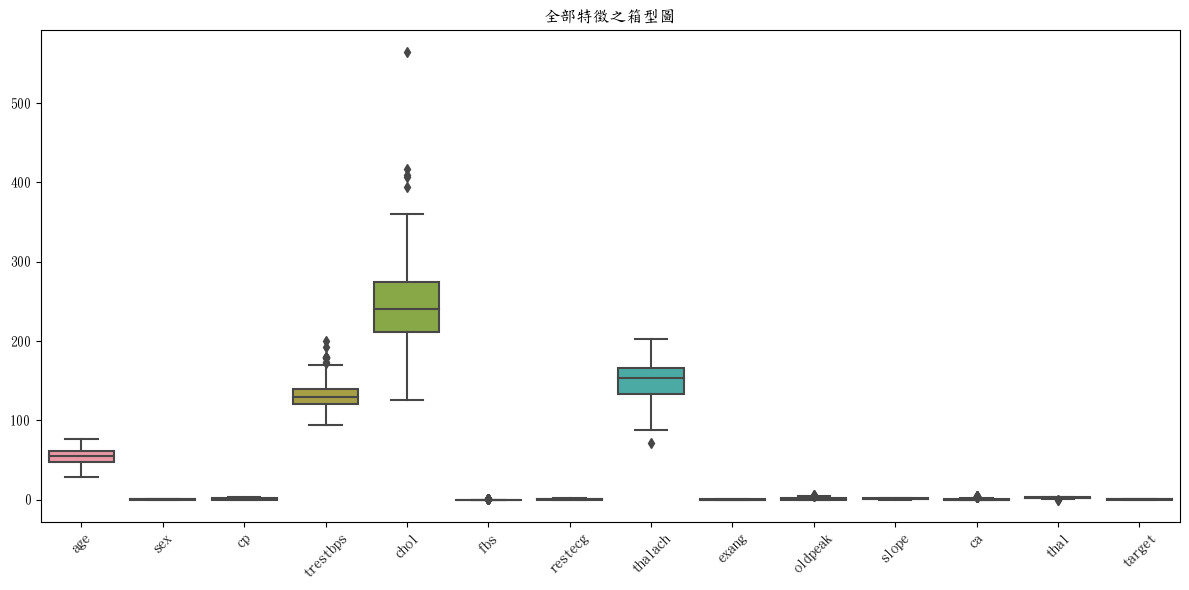

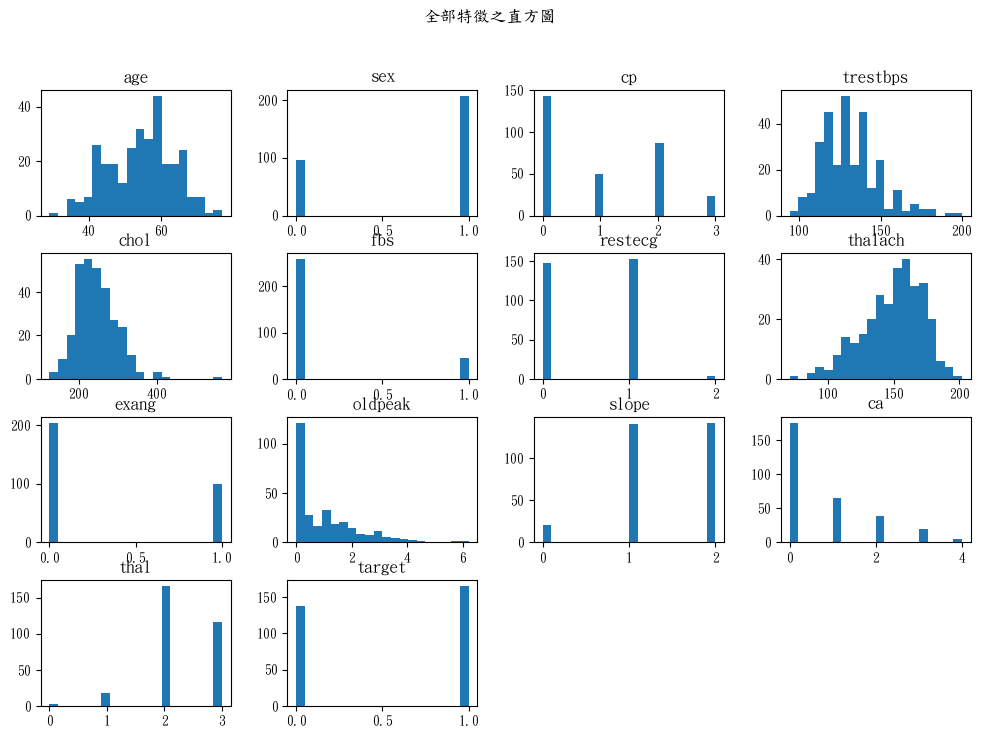

跟罹患心臟病相關特徵:
 target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


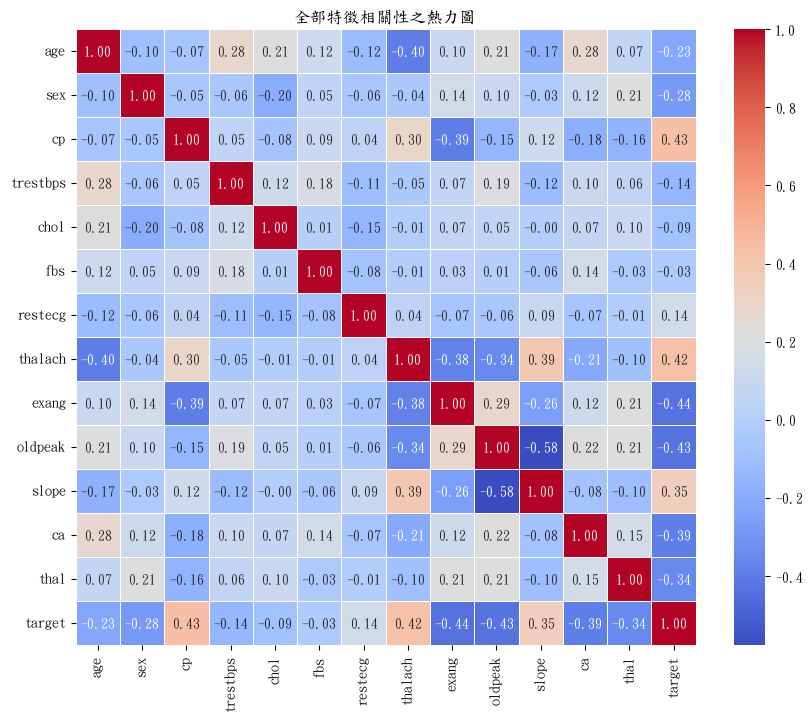

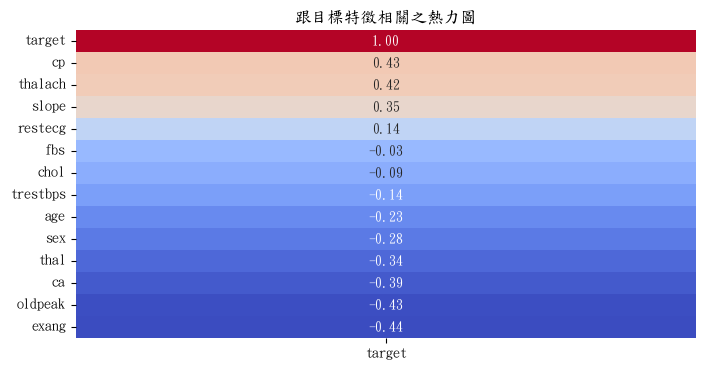

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

data = pd.read_csv('heart.csv')

rcParams['font.sans-serif'] = ['DFKai-SB']  
rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.title("全部特徵之箱型圖")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data.hist(bins=20, figsize=(12, 8), grid=False)
plt.suptitle("全部特徵之直方圖")
plt.show()


correlation_matrix = data.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("跟罹患心臟病相關特徵:\n", target_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("全部特徵相關性之熱力圖")
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("跟目標特徵相關之熱力圖")
plt.show()

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('heart.csv')

X = data.drop(columns=['target'])
y = data['target']

pearson_corr = X.corrwith(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_scores = chi2_selector.fit(X_scaled, y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

results = pd.DataFrame({
    'Feature': X.columns,
    'Pearson_Corr': pearson_corr.values,
    'Chi2_Score': chi2_scores.scores_,
    'RF_Importance': feature_importances
})

results.sort_values(by='RF_Importance', ascending=False, inplace=True)
print("特徵選擇結果：\n", results)

selected_features = results['Feature'].head(5).tolist()
print("\n選擇的特徵：", selected_features)

特徵選擇結果：
      Feature  Pearson_Corr  Chi2_Score  RF_Importance
2         cp      0.433798   20.866033       0.135346
7    thalach      0.421741    2.735347       0.129879
11        ca     -0.391724   16.610191       0.108091
12      thal     -0.344029    1.930618       0.105813
9    oldpeak     -0.430696   11.716815       0.102469
0        age     -0.225439    1.039771       0.091921
4       chol     -0.085239    0.111905       0.076270
3   trestbps     -0.144931    0.489248       0.075079
8      exang     -0.436757   38.914377       0.058675
10     slope      0.345877    4.902048       0.055157
1        sex     -0.280937    7.576835       0.030980
6    restecg      0.137230    1.489135       0.021797
5        fbs     -0.028046    0.202934       0.008522

選擇的特徵： ['cp', 'thalach', 'ca', 'thal', 'oldpeak']


                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0        Random Forest  0.826701   0.852656  0.827635  0.837399  0.898963
1  Logistic Regression  0.818282   0.813432  0.872934  0.838821  0.901516


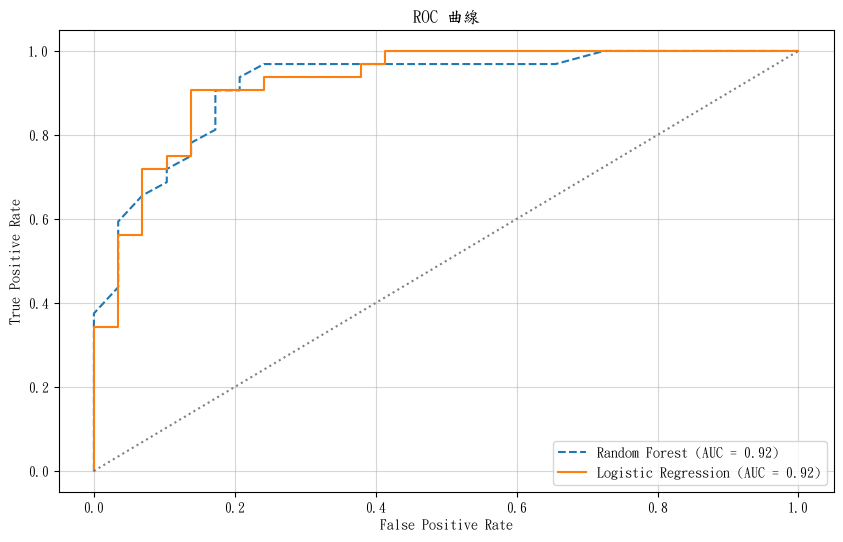

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt
from matplotlib import rcParams


X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

data = pd.read_csv('heart.csv')

if y_train.shape[1] == 1:
    y_train = y_train.iloc[:, 0]
if y_test.shape[1] == 1:
    y_test = y_test.iloc[:, 0]

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "AUC": []}

def evaluate_model(model, X, y, model_name):
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    auc_score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    
    results["Model"].append(model_name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["AUC"].append(auc_score)
    
evaluate_model(rf_model, X_train, y_train, "Random Forest")
evaluate_model(lr_model, X_train, y_train, "Logistic Regression")

result_df = pd.DataFrame(results)
print(result_df)

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

rcParams['font.sans-serif'] = ['DFKai-SB']  
rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", linestyle="--")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", linestyle="-")
plt.plot([0, 1], [0, 1], color="gray", linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC 曲線")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()
